<a href="https://colab.research.google.com/github/selinbilginay/DataScience/blob/main/Data_Exploration_Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format='{:.2f}'.format
plt.rcParams['figure.dpi']=100
title_style = {'color': 'darkred', 'size': 20 }
axis_style  = {'color': 'darkblue', 'size': 15 }

In [5]:
student_performance=pd.read_csv('/content/StudentsPerformance.csv')

In [6]:
student_performance.info()
student_performance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
student_performance.isnull().sum()*100/student_performance.shape[0]

gender                        0.00
race/ethnicity                0.00
parental level of education   0.00
lunch                         0.00
test preparation course       0.00
math score                    0.00
reading score                 0.00
writing score                 0.00
dtype: float64

**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

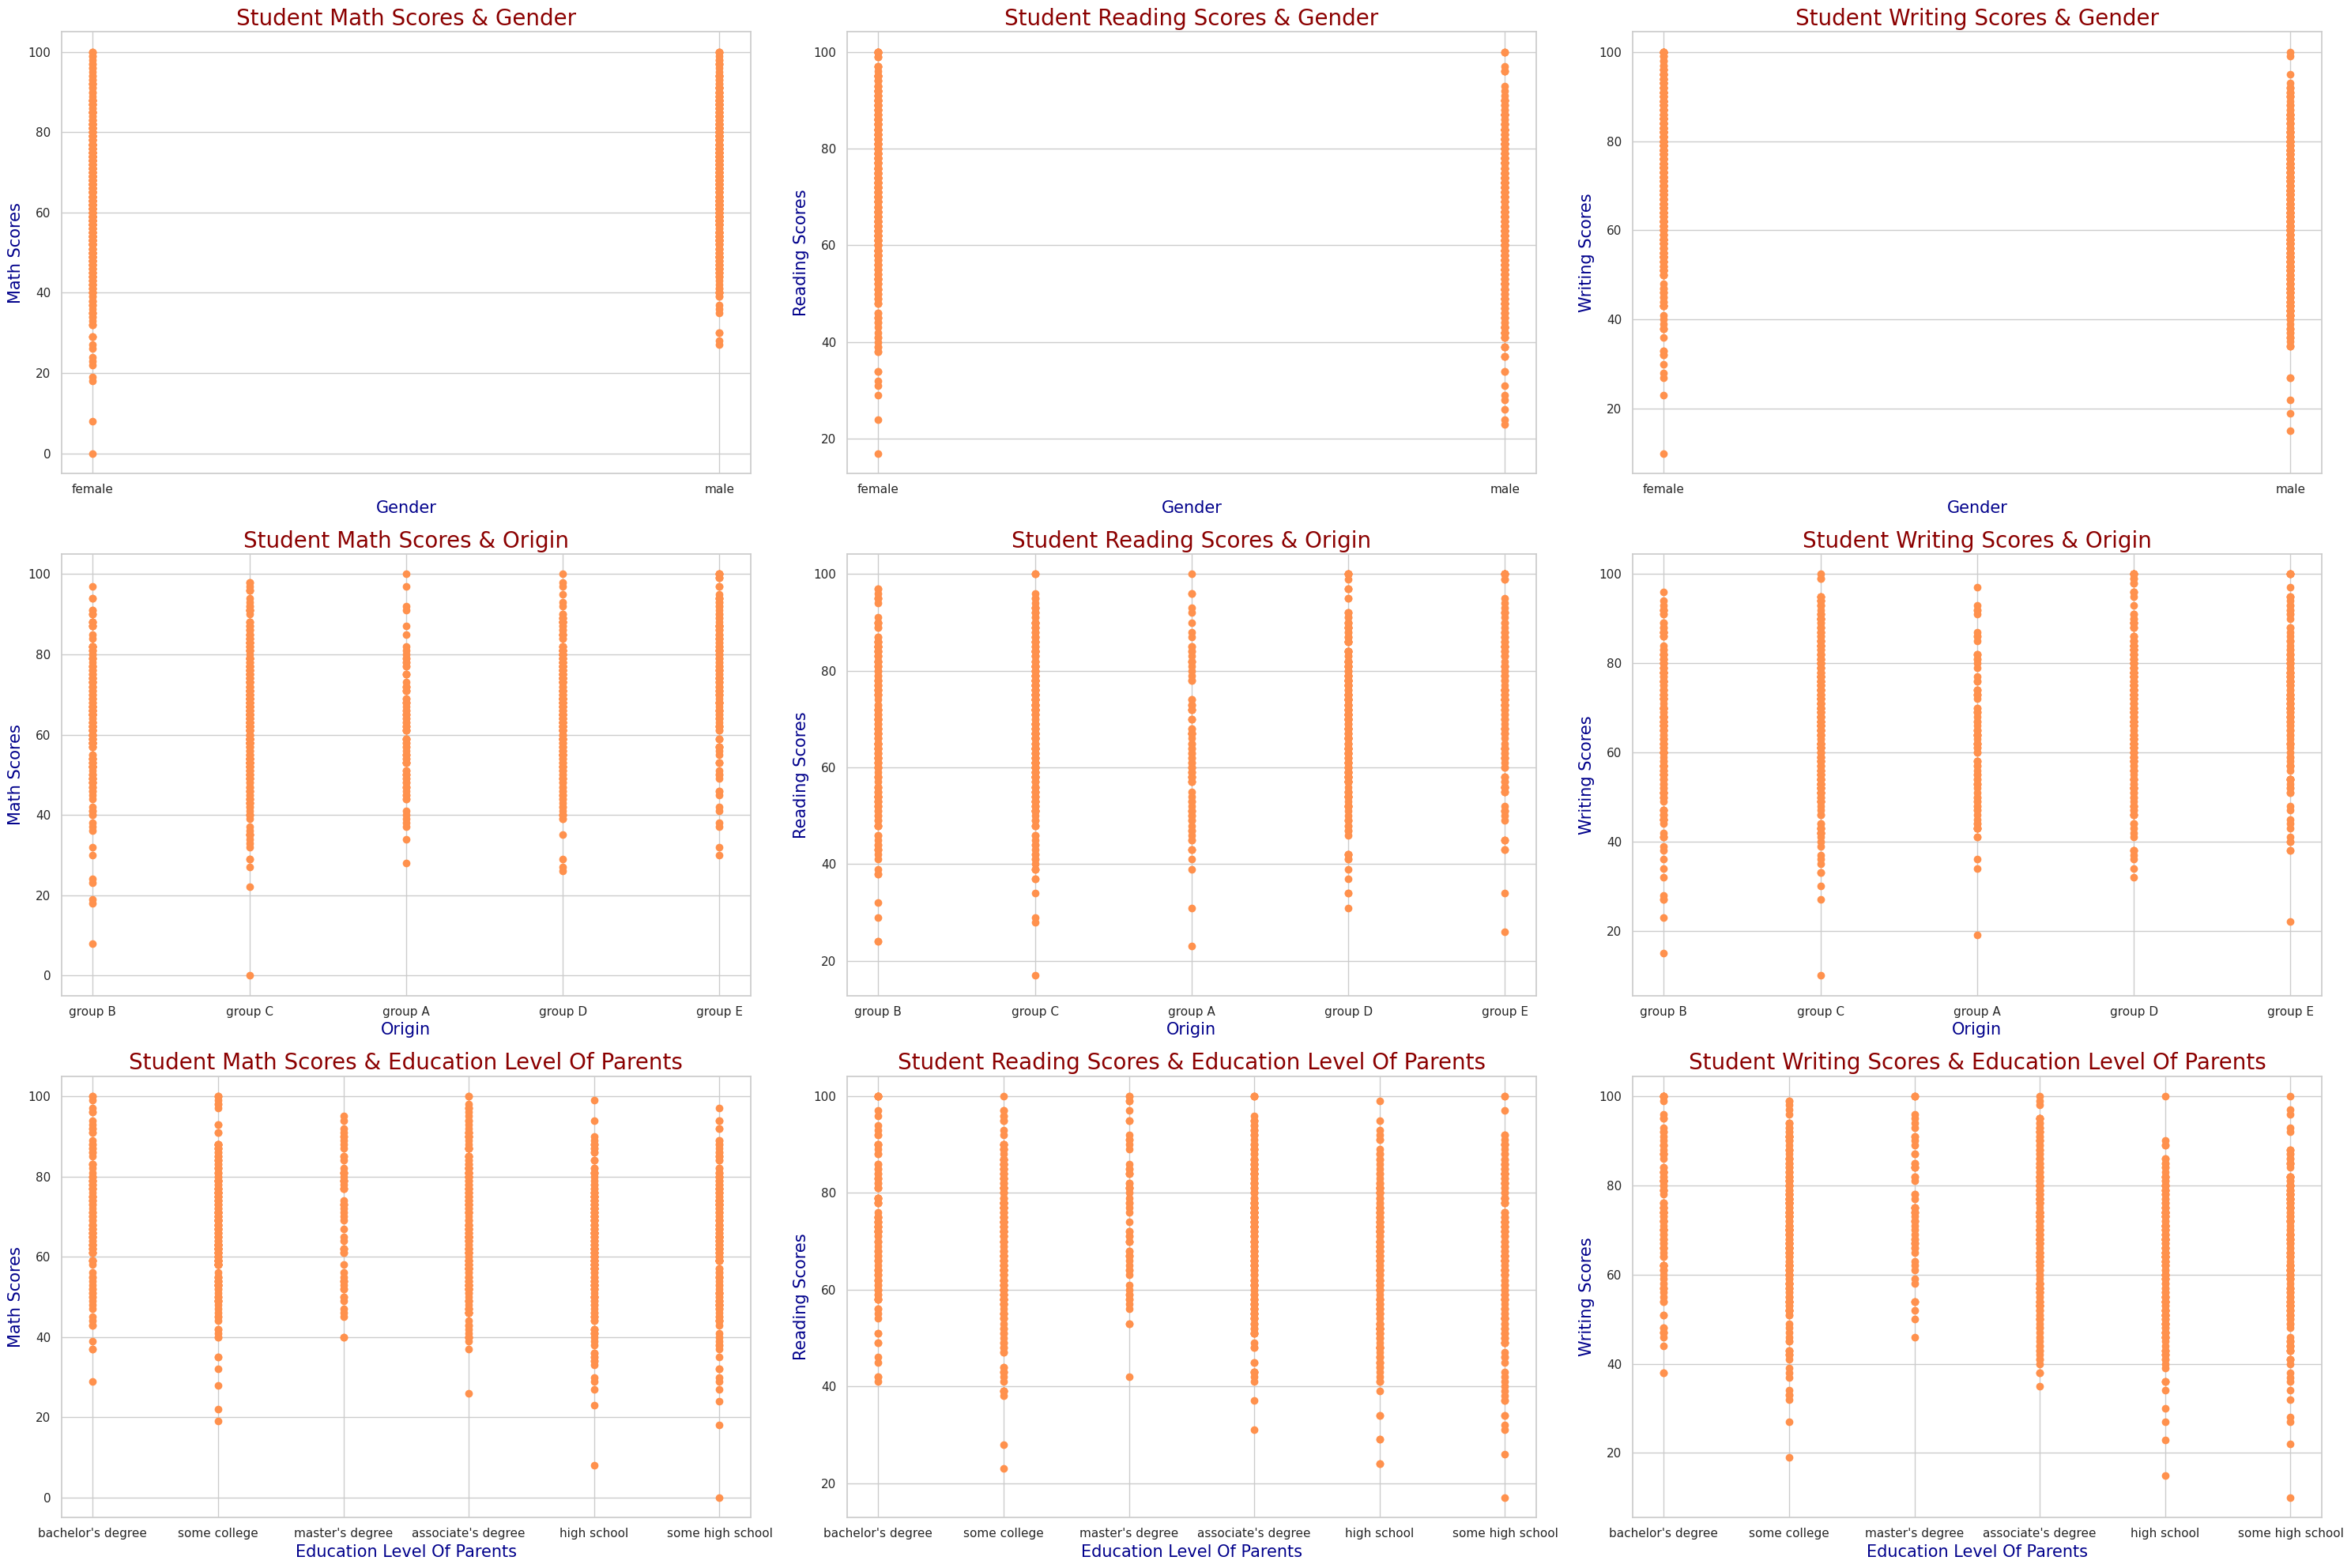

In [7]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
plt.scatter(student_performance['gender'],student_performance['math score'],c='#FF914D',linewidths=1)
plt.title('Student Math Scores & Gender',fontdict=title_style)
plt.xlabel('Gender',fontdict=axis_style)
plt.ylabel("Math Scores",fontdict=axis_style)
 

plt.subplot(3,3,2)
plt.scatter(student_performance['gender'],student_performance['reading score'],c='#FF914D',linewidths=1)
plt.title('Student Reading Scores & Gender',fontdict=title_style)
plt.xlabel('Gender',fontdict=axis_style)
plt.ylabel("Reading Scores",fontdict=axis_style)


plt.subplot(3,3,3)
plt.scatter(student_performance['gender'],student_performance['writing score'],c='#FF914D',linewidths=1)
plt.title('Student Writing Scores & Gender',fontdict=title_style)
plt.xlabel('Gender',fontdict=axis_style)
plt.ylabel("Writing Scores",fontdict=axis_style)


plt.subplot(3,3,4)
plt.scatter(student_performance['race/ethnicity'],student_performance['math score'],c='#FF914D',linewidths=1)
plt.title('Student Math Scores & Origin',fontdict=title_style)
plt.xlabel('Origin',fontdict=axis_style)
plt.ylabel("Math Scores",fontdict=axis_style)


plt.subplot(3,3,5)
plt.scatter(student_performance['race/ethnicity'],student_performance['reading score'],c='#FF914D',linewidths=1)
plt.title('Student Reading Scores & Origin',fontdict=title_style)
plt.xlabel('Origin',fontdict=axis_style)
plt.ylabel("Reading Scores",fontdict=axis_style)


plt.subplot(3,3,6)
plt.scatter(student_performance['race/ethnicity'],student_performance['writing score'],c='#FF914D',linewidths=1)
plt.title('Student Writing Scores & Origin',fontdict=title_style)
plt.xlabel('Origin',fontdict=axis_style)
plt.ylabel("Writing Scores",fontdict=axis_style)


plt.subplot(3,3,7)
plt.scatter(student_performance['parental level of education'],student_performance['math score'],c='#FF914D',linewidths=1)
plt.title('Student Math Scores & Education Level Of Parents',fontdict=title_style)
plt.xlabel('Education Level Of Parents',fontdict=axis_style)
plt.ylabel("Math Scores",fontdict=axis_style)


plt.subplot(3,3,8)
plt.scatter(student_performance['parental level of education'],student_performance['reading score'],c='#FF914D',linewidths=1)
plt.title('Student Reading Scores & Education Level Of Parents',fontdict=title_style)
plt.xlabel('Education Level Of Parents',fontdict=axis_style)
plt.ylabel("Reading Scores",fontdict=axis_style)


plt.subplot(3,3,9)
plt.scatter(student_performance['parental level of education'],student_performance['writing score'],c='#FF914D',linewidths=1)
plt.title('Student Writing Scores & Education Level Of Parents',fontdict=title_style)
plt.xlabel('Education Level Of Parents',fontdict=axis_style)
plt.ylabel("Writing Scores",fontdict=axis_style)

plt.tight_layout()
plt.show()

 - When we look at the graphs above, we can see that gender and origin does not affect the grades of student but we see that education level of parents can have a little affect on the grades. We can see from the last 3 graphs that increase in the education level of parents is partially directly proportional to the increase in the grades of the students.

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

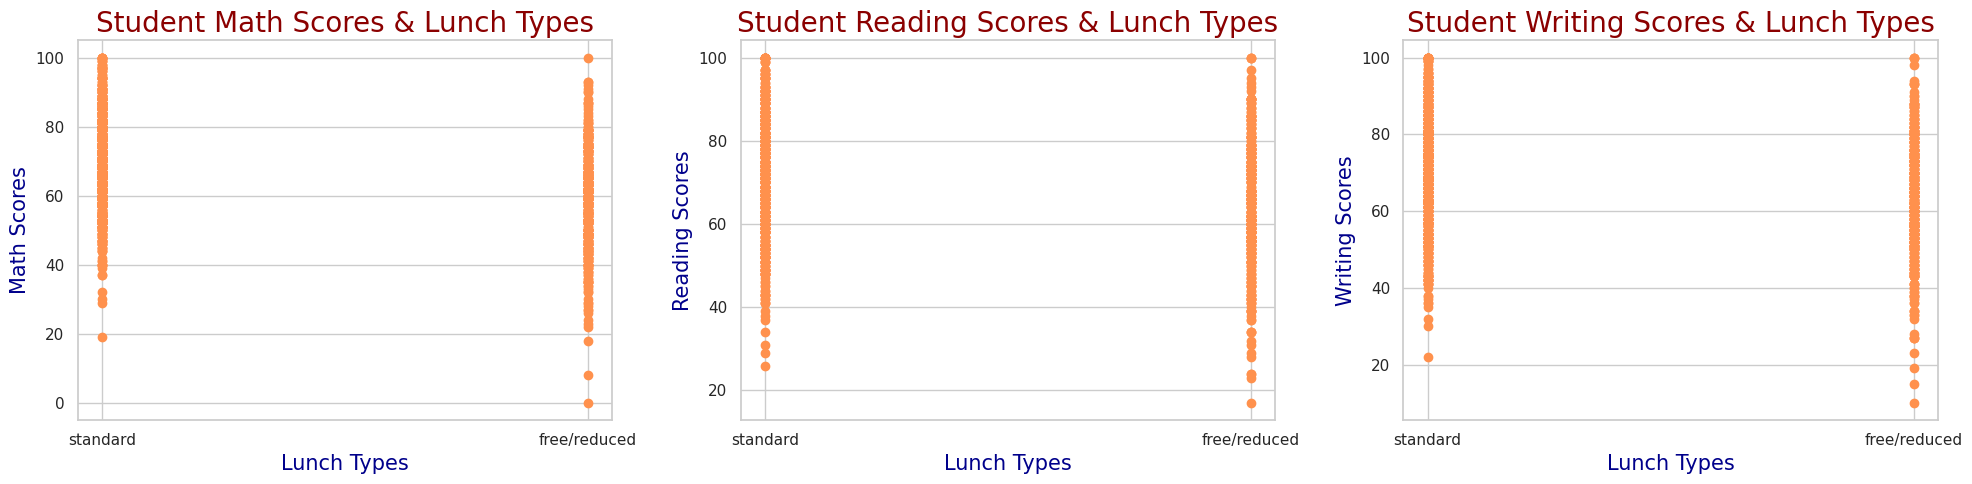

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(student_performance['lunch'],student_performance['math score'],c='#FF914D',linewidths=1)
plt.title('Student Math Scores & Lunch Types',fontdict=title_style)
plt.xlabel('Lunch Types',fontdict=axis_style)
plt.ylabel("Math Scores",fontdict=axis_style)
 

plt.subplot(1,3,2)
plt.scatter(student_performance['lunch'],student_performance['reading score'],c='#FF914D',linewidths=1)
plt.title('Student Reading Scores & Lunch Types',fontdict=title_style)
plt.xlabel('Lunch Types',fontdict=axis_style)
plt.ylabel("Reading Scores",fontdict=axis_style)


plt.subplot(1,3,3)
plt.scatter(student_performance['lunch'],student_performance['writing score'],c='#FF914D',linewidths=1)
plt.title('Student Writing Scores & Lunch Types',fontdict=title_style)
plt.xlabel('Lunch Types',fontdict=axis_style)
plt.ylabel("Writing Scores",fontdict=axis_style)

plt.tight_layout()
plt.show()

 - I think that there is a relation between lunch and grades. When we look at the graphs again,  we can see that students who eat standard lunch get higher grades while other students with free/reduced lunch get lower grades.

**(3)** Does the preparation courses have an impact on exam performance?

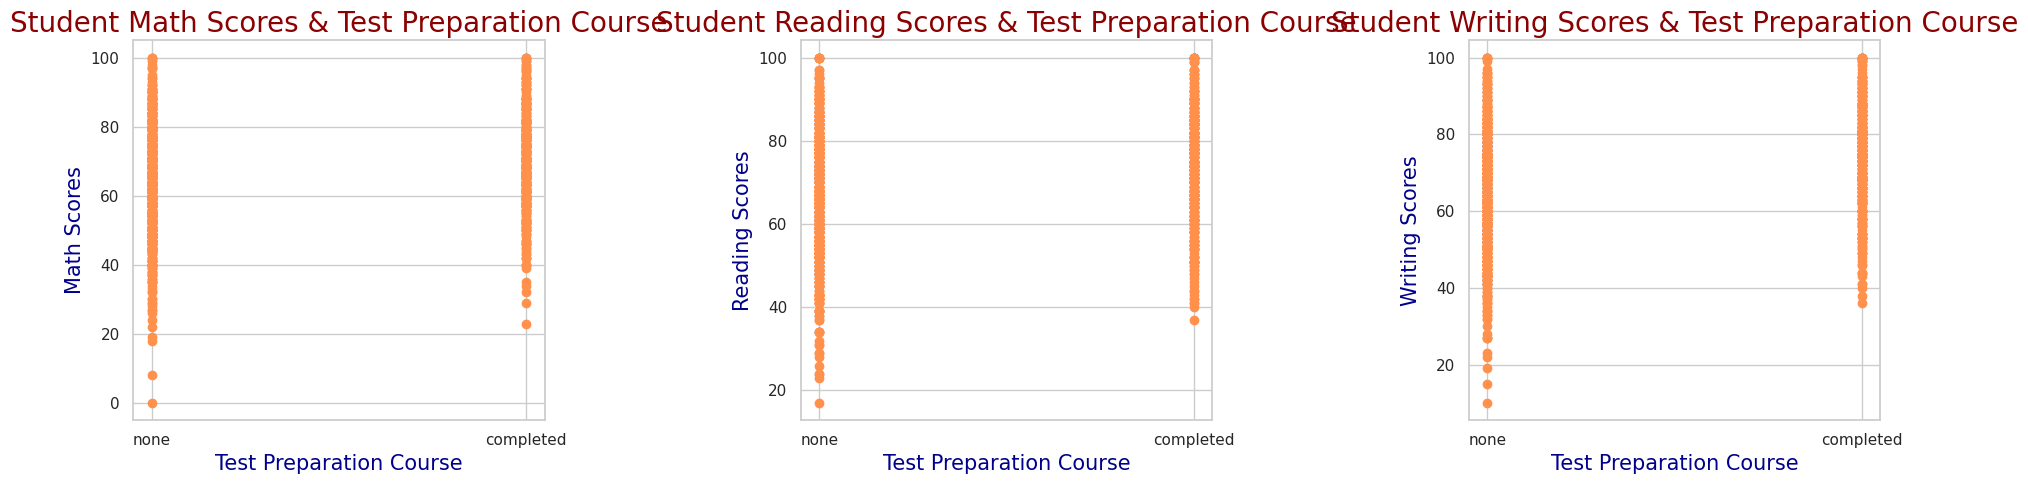

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(student_performance['test preparation course'],student_performance['math score'],c='#FF914D',linewidths=1)
plt.title('Student Math Scores & Test Preparation Course',fontdict=title_style)
plt.xlabel('Test Preparation Course',fontdict=axis_style)
plt.ylabel("Math Scores",fontdict=axis_style)
 

plt.subplot(1,3,2)
plt.scatter(student_performance['test preparation course'],student_performance['reading score'],c='#FF914D',linewidths=1)
plt.title('Student Reading Scores & Test Preparation Course',fontdict=title_style)
plt.xlabel('Test Preparation Course',fontdict=axis_style)
plt.ylabel("Reading Scores",fontdict=axis_style)


plt.subplot(1,3,3)
plt.scatter(student_performance['test preparation course'],student_performance['writing score'],c='#FF914D',linewidths=1)
plt.title('Student Writing Scores & Test Preparation Course',fontdict=title_style)
plt.xlabel('Test Preparation Course',fontdict=axis_style)
plt.ylabel("Writing Scores",fontdict=axis_style)

plt.tight_layout()
plt.show()

 - We can see that student who completed the test preparation course gets higher grades while the other students get lower grades. So we can say that completing the test preparation course have an good impact on the students grades.

**(4)** Which lessons are most correlated with each other?

In [144]:
student_performance.groupby("lunch").mean().T

lunch,free/reduced,standard
math score,58.92,70.03
reading score,64.65,71.65
writing score,63.02,70.82


In [145]:
student_performance.groupby("gender").mean().T

gender,female,male
math score,63.63,68.73
reading score,72.61,65.47
writing score,72.47,63.31


In [146]:
student_performance.groupby("race/ethnicity").mean().T

race/ethnicity,group A,group B,group C,group D,group E
math score,61.63,63.45,64.46,67.36,73.82
reading score,64.67,67.35,69.10,70.03,73.03
writing score,62.67,65.60,67.83,70.15,71.41


In [147]:
student_performance.groupby("parental level of education").mean().T

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.88,69.39,62.14,69.75,67.13,63.50
reading score,70.93,73.00,64.70,75.37,69.46,66.94
writing score,69.90,73.38,62.45,75.68,68.84,64.89


In [148]:
student_performance.groupby("test preparation course").mean().T

test preparation course,completed,none
math score,69.70,64.08
reading score,73.89,66.53
writing score,74.42,64.50


In [17]:
genders = student_performance['gender'].unique()
lunches = student_performance['lunch'].unique()
parent_education = student_performance['parental level of education'].unique()
tests = student_performance['test preparation course'].unique()
origin = student_performance['race/ethnicity'].unique()

2
2
6
2
5


In [39]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
  comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
  print("For the sake of comparison {} and genders".format(var,variable),end='')
  for i in range(0, len(genders)):
    for j in range(i+1, len(genders)):
      ttest = stats.ttest_ind(student_performance[student_performance["gender"]==genders[i]][var], student_performance[student_performance["gender"]==genders[j]][var])
      group_1 = genders[i]
      group_2 = genders[j]
      statistic = ttest[0]
      p_value = ttest[1]
      comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
      display(comparison)

For the sake of comparison math score and genders

,group_1,group_2,statistic,p_value
0,female,male,-5.383245869828983,0.000000091201855


For the sake of comparison reading score and genders

,group_1,group_2,statistic,p_value
0,female,male,7.959308005187657,0.000000000000005


For the sake of comparison writing score and genders

,group_1,group_2,statistic,p_value
0,female,male,9.979557910004507,0.000000000000000


In [40]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {} and lunches ".format(var),end='')
    for i in range(0, len(lunches)):
        for j in range(i+1, len(lunches)):
            ttest = stats.ttest_ind(student_performance[student_performance['lunch']==lunches[i]][var], student_performance[student_performance['lunch']==lunches[j]][var])
            group_1 = lunches[i]
            group_2 = lunches[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
            display(comparison)

For the sake of comparison math score and lunches 

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.837180472914612,0.000000000000000


For the sake of comparison reading score and lunches 

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.451056467473455,0.000000000000200


For the sake of comparison writing score and lunches 

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.009784197834758,0.000000000000003


In [41]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {} and test preparation course ".format(var),end='')
    for i in range(0, len(tests)):
        for j in range(i+1, len(tests)):
            ttest = stats.ttest_ind(student_performance[student_performance['test preparation course']==tests[i]][var], student_performance[student_performance['test preparation course']==tests[j]][var])
            group_1 = tests[i]
            group_2 = tests[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
            display(comparison)   

For the sake of comparison math score and test preparation course 

,group_1,group_2,statistic,p_value
0,none,completed,-5.704616417349102,0.000000015359135


For the sake of comparison reading score and test preparation course 

,group_1,group_2,statistic,p_value
0,none,completed,-7.871663538941468,0.000000000000009


For the sake of comparison writing score and test preparation course 

,group_1,group_2,statistic,p_value
0,none,completed,-10.409173436808748,0.000000000000000


In [46]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {} and origin ".format(var),end='')
    for i in range(0, len(origin)):
        for j in range(i+1, len(origin)):
            ttest = stats.ttest_ind(student_performance[student_performance['race/ethnicity']==origin[i]][var], student_performance[student_performance['race/ethnicity']==origin[j]][var])
            group_1 = origin[i]
            group_2 = origin[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score and origin 

,group_1,group_2,statistic,p_value
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


For the sake of comparison reading score and origin 

,group_1,group_2,statistic,p_value
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


For the sake of comparison writing score and origin 

,group_1,group_2,statistic,p_value
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


In [47]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["math score","reading score","writing score"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {} and parent education  ".format(var),end='')
    for i in range(0, len(parent_education)):
        for j in range(i+1, len(parent_education)):
            ttest = stats.ttest_ind(student_performance[student_performance['parental level of education']==parent_education[i]][var], student_performance[student_performance['parental level of education']==parent_education[j]][var])
            group_1 = parent_education[i]
            group_2 = parent_education[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison math score and parent education  

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


For the sake of comparison reading score and parent education  

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


For the sake of comparison writing score and parent education  

,group_1,group_2,statistic,p_value
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


When we look at the p-values of genders, lunch, parent education, test preparation course and origin, we see that exam scores does not differ as we group by genders, lunch test preparation course and origin. but when we look at the parent education we see that there some important p-values:
- In math scores  
   **bachelor's degree	& master's degree**

   **some college & associate's degree**

      



So, the assumptions I made just by looking at graphs may be wrong because p-values did not give the same result as graphs above.